# Importing Libraries

In [ ]:
from pylab import *
import pandas as pd

# Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/netflix1.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Data Pre-processing

## Removing unnecessary columns

In [ ]:
#show_id is not required for data analysis
df.drop(['show_id'],axis="columns",inplace=True)

In [ ]:
df.columns                      
#show_id has been successfully removed

Index(['type', 'title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
df.shape

(8790, 9)

In [ ]:
df.info()                          #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   country       8790 non-null   object
 4   date_added    8790 non-null   object
 5   release_year  8790 non-null   int64 
 6   rating        8790 non-null   object
 7   duration      8790 non-null   object
 8   listed_in     8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 618.2+ KB


## Dropping Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape                       #duplicates have been removed.

(8787, 9)

## Data Formatting

In [ ]:
#converting date_added column to a more convenient column by replacing the column with the year added 
def y(date):
  h = date[-4:]
  return h

H = list(df['date_added'])
s = []
for i in H:
  s.append(y(i))

df['date_added'].replace(to_replace=H,value=s,inplace=True)
df.head()


,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df['date_added'].unique()              #All relevant values

array(['2021', '2019', '2018', '2020', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2009', '2008', '2010'], dtype=object)

In [ ]:
df.rename(columns={'date_added':'year_added'},inplace = True)


In [ ]:
df.head()                         #Column name has been changed successfully

,type,title,director,country,year_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
#Director statistics
df['director'].value_counts()

Not Given                         2587
Rajiv Chilaka                       20
Raúl Campos, Jan Suter              18
Alastair Fothergill                 18
Marcus Raboy                        16
                                  ... 
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64

In [ ]:
2587/df['director'].size *100     #Since there are huge number of unknown values, all the rows with irrelevant director names are removed.

29.441219984067374

In [ ]:
#To avoid false creditation by filling the "Not Given" by any other director's name, it is very important that all the rows with director unknown must be removed. (MCAR - Missing Completley At Random)
df.drop(df[df["director"]=="Not Given"].index,inplace=True)


In [ ]:
df.shape

(6200, 9)

In [ ]:
M = list(df['title'].unique())
"Not Given" in M                      #Title column doesn't have any irrelevant string

False

In [ ]:
df['country'].value_counts()            #There are 287 unknown values.

United States     2401
India              974
United Kingdom     406
Not Given          287
Canada             189
                  ... 
Zimbabwe             1
Mozambique           1
Namibia              1
Cameroon             1
Croatia              1
Name: country, Length: 79, dtype: int64

In [ ]:
287/df['country'].size * 100  #Unknown values are less than 10%. So, it can be ignored.

4.629032258064516

In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df['rating'].value_counts()

TV-MA       2123
TV-14       1459
R            794
TV-PG        547
PG-13        489
PG           286
TV-Y7        133
TV-G         123
TV-Y         121
NR            75
G             41
TV-Y7-FV       4
UR             3
NC-17          2
Name: rating, dtype: int64

In [ ]:
df['duration'].unique()

array(['90 min', '1 Season', '91 min', '125 min', '9 Seasons', '104 min',
       '87 min', '127 min', '76 min', '71 min', '39 min', '36 min',
       '34 min', '35 min', '46 min', '67 min', '65 min', '61 min',
       '166 min', '103 min', '97 min', '106 min', '147 min', '94 min',
       '161 min', '111 min', '110 min', '105 min', '96 min', '124 min',
       '116 min', '98 min', '115 min', '122 min', '99 min', '88 min',
       '100 min', '23 min', '102 min', '93 min', '95 min', '85 min',
       '83 min', '182 min', '92 min', '84 min', '48 min', '145 min',
       '119 min', '80 min', '128 min', '143 min', '117 min', '114 min',
       '118 min', '108 min', '121 min', '63 min', '142 min', '113 min',
       '154 min', '120 min', '82 min', '109 min', '101 min', '86 min',
       '229 min', '89 min', '156 min', '112 min', '107 min', '129 min',
       '135 min', '136 min', '165 min', '150 min', '133 min', '70 min',
       '78 min', '140 min', '2 Seasons', '64 min', '59 min', '69 min',
       '14

In [ ]:
df['listed_in'].unique()
P = list(df['listed_in'].unique())

# Data Visualization

## Content type -  TV Shows vs Movies




(-1.1083034709007216,
 1.1003954033762249,
 -1.1065471688539834,
 1.106550439509239)

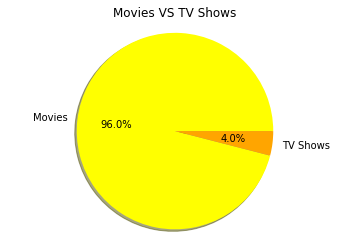

In [ ]:
#Pie Chart
labels = ['Movies','TV Shows']
values = df['type'].value_counts()
colors = ['Yellow','Orange']
title('Movies VS TV Shows')
pie(values,labels=labels,colors=colors,shadow=True,startangle=0,autopct="%1.1f%%")
axis('equal')

## Top 5 Countries

In [ ]:
top_countries = dict(df['country'].value_counts())
top5_countrynames =list(top_countries.keys())
top5_countries = list(top_countries.values())
top5_countrynames = top5_countrynames[:6]
del(top5_countrynames[-3])
print(top5_countrynames)
top5_countries = top5_countries[:6]
del(top5_countries[-3])
print(top5_countries)









['United States', 'India', 'United Kingdom', 'Canada', 'France']
[2401, 974, 406, 189, 156]


(-1.1003578637355134,
 1.1075150568676528,
 -1.1124181512910796,
 1.1302280043686888)

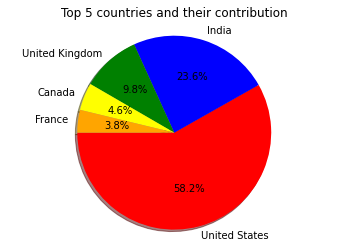

In [ ]:
labels = top5_countrynames
values = top5_countries
colors = ['Red','Blue','Green','Yellow','Orange']
title('Top 5 countries and their contribution')
pie(values,labels=labels,colors=colors,shadow=True,startangle=180,autopct="%1.1f%%")
axis('equal')


{'2019': 1423, '2020': 1318, '2018': 1218, '2021': 1036, '2017': 855, '2016': 245, '2015': 60, '2014': 18, '2011': 13, '2013': 7, '2012': 3, '2009': 2, '2008': 1, '2010': 1}
[1, 1, 2, 3, 7, 13, 18, 60, 245, 855, 1036, 1218, 1318, 1423]
['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


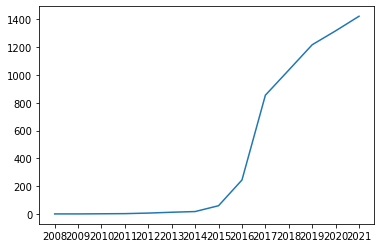

In [ ]:
# Content addded throughout the years
j = dict(df['year_added'].value_counts())
print(j)
h = list(j.keys())
h.sort()
i = list(j.values())
i.sort()
print(i)
print(h)
plot(h,i)


### Ratings Bar Chart

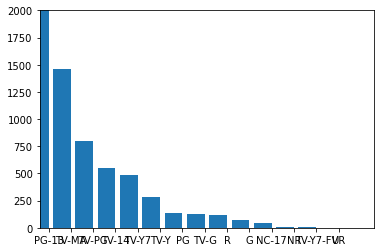

In [ ]:
ratings = list(df['rating'].value_counts())
axis([0,15,0,2000])

labels = list(df['rating'].unique())
index = arange(0,len(labels))
bar(labels,ratings)
xticks(index+0.4,labels)
show()

### Top 5 Directors

In [ ]:
topD = dict(df['director'].value_counts())
print(topD)
names = list(topD.keys())

names = names[:5]
print(names)
values = list(topD.values())
values.sort

print(values)
values = values[:5]
print(values)

{'Rajiv Chilaka': 20, 'Raúl Campos, Jan Suter': 18, 'Alastair Fothergill': 18, 'Suhas Kadav': 16, 'Marcus Raboy': 16, 'Jay Karas': 14, 'Cathy Garcia-Molina': 13, 'Martin Scorsese': 12, 'Youssef Chahine': 12, 'Jay Chapman': 12, 'Steven Spielberg': 11, 'Mark Thornton, Todd Kauffman': 10, 'Don Michael Paul': 10, 'David Dhawan': 9, 'Ryan Polito': 8, 'Fernando Ayllón': 8, 'Johnnie To': 8, 'Troy Miller': 8, 'Lance Bangs': 8, 'Kunle Afolayan': 8, 'Yılmaz Erdoğan': 8, 'Robert Rodriguez': 8, 'Shannon Hartman': 8, 'Quentin Tarantino': 8, 'Hakan Algül': 8, 'Prakash Satam': 7, 'S.S. Rajamouli': 7, 'McG': 7, 'Justin G. Dyck': 7, 'Omoni Oboli': 7, 'Ron Howard': 7, 'Mae Czarina Cruz': 7, 'Toshiya Shinohara': 7, 'Ozan Açıktan': 7, 'Clint Eastwood': 7, 'Ram Gopal Varma': 7, 'Hidenori Inoue': 7, 'David Fincher': 6, 'Steven Soderbergh': 6, 'Wenn V. Deramas': 6, 'Lasse Hallström': 6, 'Rajkumar Santoshi': 6, 'Imtiaz Ali': 6, 'Matt Askem': 6, 'Anees Bazmee': 6, 'Robert Vince': 6, 'Vlad Yudin': 6, 'Krysia Pl

(-1.131777020480117,
 1.2598607183964936,
 -1.1239956625586054,
 1.2276883246334052)

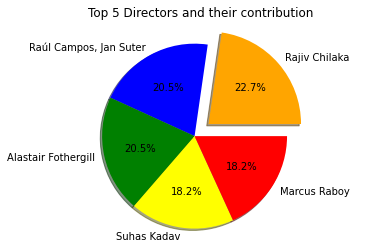

In [ ]:
# Pie Chart
colors = ['Orange','Blue','Green','Yellow','Red']
pie(values,labels=names,colors=colors,shadow=True,explode=[0.2,0,0,0,0],autopct="%1.1f%%")
title('Top 5 Directors and their contribution')
axis('equal')

### Release year with highest content

(-1.1182719600401931,
 1.2835915186811482,
 -1.1018322587766927,
 1.1068557568687347)

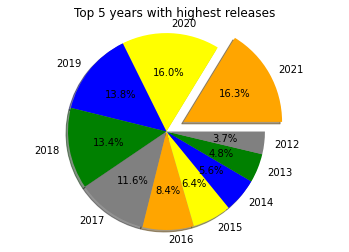

In [ ]:
years = list(df['release_year'].unique())
years.sort()
years.reverse()
years = years[:10]
values = list(df['release_year'].value_counts())
values.sort()
values.reverse()
values = values[:10]
title('Top 5 years with highest releases')
pie(values,labels=years,colors=['Orange','Yellow','Blue',"Green",'Grey'],autopct="%1.1f%%",shadow=True,explode=[0.2,0,0,0,0,0,0,0,0,0])
axis('equal')